In [20]:
# Better error messages in notebooks
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Set up and data paths

import sys
from pathlib import Path

# Get to project root from notebook location
PROJECT_ROOT = Path.cwd().parent
DATA_ROOT = Path("/mnt/h/SARFish/Generated/SLC")
# Add "src" to Python's module search path sys.path
sys.path.append(str(PROJECT_ROOT / "modelling" / "src"))

# Define Data path
DATA_DIR = DATA_ROOT / "train/crops"

print(f"PROJECT_ROOT: {PROJECT_ROOT}")
print(f"DATA_ROOT: {DATA_ROOT}")
print(f"DATA_DIR: {DATA_DIR}")

PROJECT_ROOT: /home/peterm/UWA/CITS5014/SARFish
DATA_ROOT: /mnt/h/SARFish/Generated/SLC
DATA_DIR: /mnt/h/SARFish/Generated/SLC/train/crops


In [22]:
from sar_slc_augmentation import SARSLCPreprocessingAugmentation

# Create augmentor with custom settings
augmentor = SARSLCPreprocessingAugmentation(
    geometric_probs={
        0: {'hflip': 0.3, 'vflip': 0.0, 'rotate': 0.0, 'translate': 0.0},
        1: {'hflip': 0.8, 'vflip': 0.0, 'rotate': 0.0, 'translate': 0.0}
    },
    sar_probs={
        0: {'intensity': 0.0, 'phase': 0.0, 'speckle': 0.0},  # No SAR aug for majority
        1: {'intensity': 0.0, 'phase': 0.0, 'speckle': 0.0}   # SAR aug for minority
    },
    mosaic_prob={0: 0.0, 1: 0.0},  # Only mosaic for minority class
    min_visibility=0.3,  # proportion of BBox that must remain visible after augmentation for retention.
)

# Process training data
augmentor.process_directory(
    input_dir=str(DATA_DIR / 'images'), # raw input crops
    output_dir=str(DATA_DIR / 'images_hflip'), # raw augmented crops
    labels_dir=str(DATA_DIR / 'labels'),
    output_labels_dir=str(DATA_DIR / 'labels_flip'),
    augmentations_per_image={0: 1, 1: 3}  # 3x augmentations for minority
)

Scanning labels for file categorization...


Scanning: 100%|█████████████████████████████████████████████████████████████████████| 3114/3114 [01:47<00:00, 29.08it/s]



File categorization:
Files with class 0 (is_vessel): 2345
Files with class 1 (is_fishing): 769
Files with no labels: 0

Processing augmentations...


Augmenting: 100%|███████████████████████████████████████████████████████████████████| 3114/3114 [18:22<00:00,  2.82it/s]


Creating mosaic augmentations...
Creating 0 mosaics for minority class
Creating 0 mosaics for majority class
Created 0 total mosaics

Augmentation Summary:
Original SLC data files: 3114
Augmented SLC data files created: 2502
Augmented files with empty labels: 0
Total SLC data files after augmentation: 5616

Class Distribution Analysis:
Original data:
  Class 0 (is_vessel) only: 2345
  Class 1 (is_fishing) only: 769
  Both classes: 0
  No labels: 0

Augmented data:
  Class 0 (is_vessel) only: 661
  Class 1 (is_fishing) only: 1841
  Both classes: 0
  No labels: 0

Total class occurrences:
Original - Class 0: 2345, Class 1: 769 (Ratio 3.05:1)
After augmentation - Class 0: 3006, Class 1: 2610 (Ratio 1.15:1)


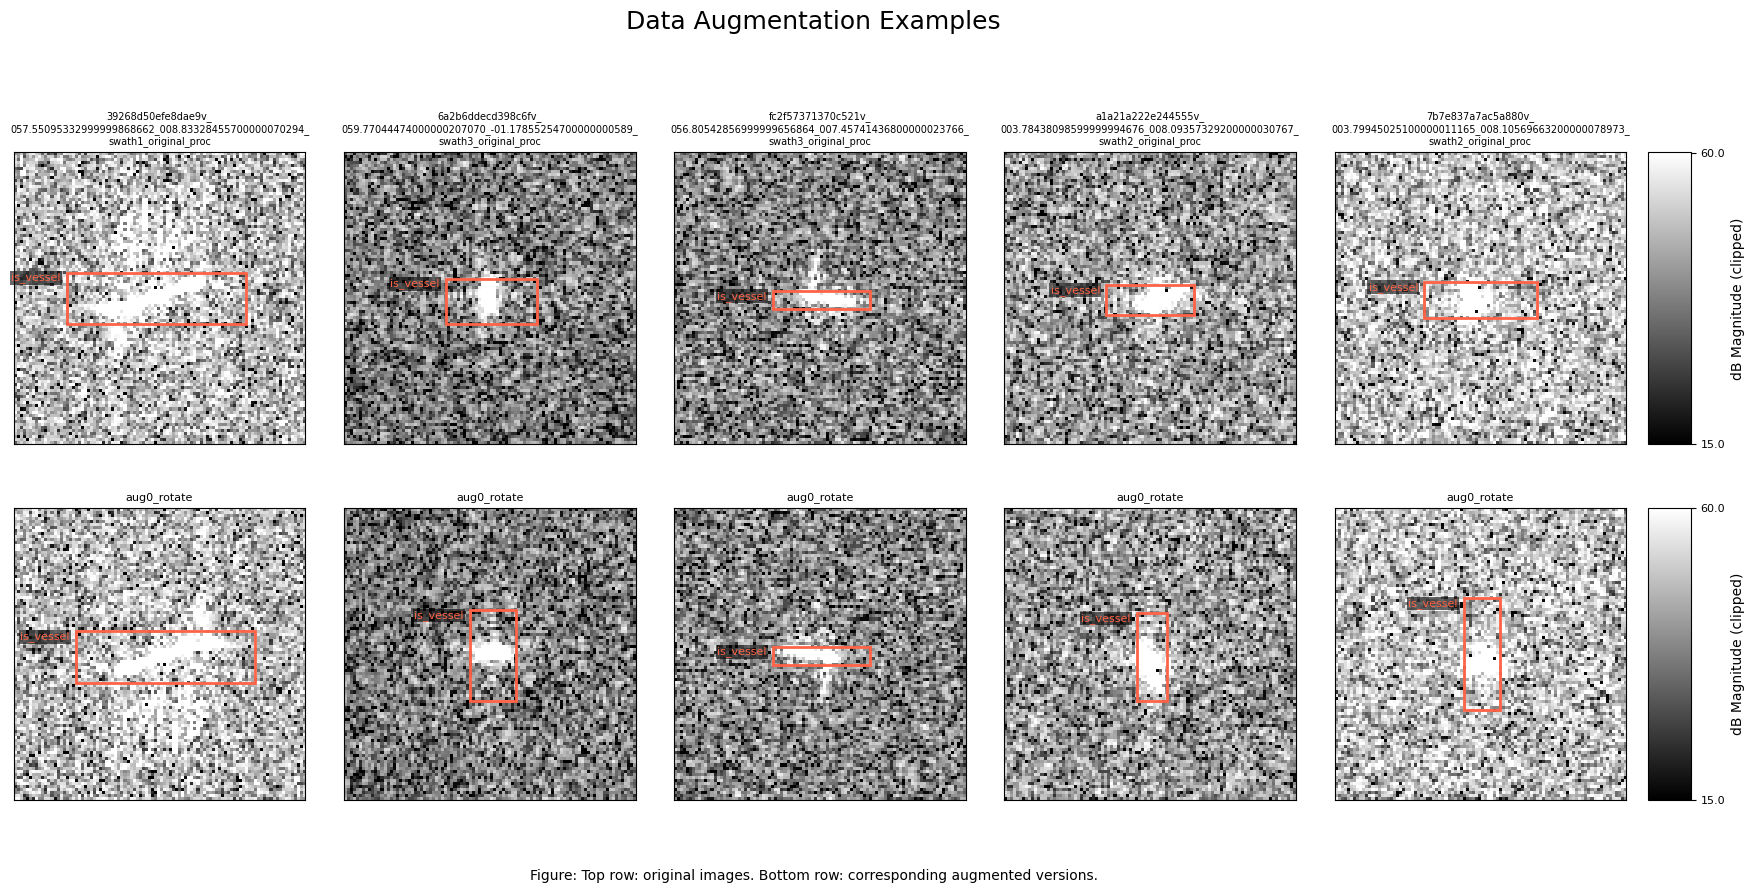

Displayed 10 image crops with bounding boxes.


In [18]:
from view_augmentations import view_augmentations
view_augmentations(
    base_dir=str(DATA_DIR),
    max_images=10,
    clip_db_min=15,
    clip_db_max=60,
    class_filter=None, # filter not applicable for mosaics
    save_path=None,
    select_mosaics=False
)

In [19]:
from view_augmentations import view_augmentations
view_augmentations(
    base_dir=str(DATA_DIR / 'train_augmented'),
    max_images=10,
    clip_db_min=15,
    clip_db_max=60,
    class_filter=None,
    save_path=None,
    select_mosaics=True
)

No mosaic images found matching pattern 'mosaic_minority_X.npy'.
